In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/kaggle/input/health-and-sleep-statistics/Health_Sleep_Statistics.csv")

In [4]:
df.head()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,1,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,2,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,3,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,4,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,5,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


In [5]:
df.tail()

,User ID,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
95,96,43,m,7,00:45,07:15,6500,2400,medium,medium,no,no
96,97,33,f,8,23:15,06:15,8500,2600,high,medium,no,no
97,98,46,m,4,01:30,07:00,3000,2000,low,unhealthy,yes,yes
98,99,25,f,9,22:15,06:45,9500,2700,high,healthy,no,no
99,100,41,m,6,00:30,07:00,5000,2200,medium,unhealthy,no,no


In [6]:
df.shape

(100, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User ID                  100 non-null    int64 
 1   Age                      100 non-null    int64 
 2   Gender                   100 non-null    object
 3   Sleep Quality            100 non-null    int64 
 4   Bedtime                  100 non-null    object
 5   Wake-up Time             100 non-null    object
 6   Daily Steps              100 non-null    int64 
 7   Calories Burned          100 non-null    int64 
 8   Physical Activity Level  100 non-null    object
 9   Dietary Habits           100 non-null    object
 10  Sleep Disorders          100 non-null    object
 11  Medication Usage         100 non-null    object
dtypes: int64(5), object(7)
memory usage: 9.5+ KB


In [8]:
df.describe()

,User ID,Age,Sleep Quality,Daily Steps,Calories Burned
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,50.500000,36.010000,7.000000,6830.000000,2421.00000
std,29.011492,8.454865,1.734964,2498.706736,281.06759
min,1.000000,22.000000,4.000000,3000.000000,2000.00000
25%,25.750000,28.750000,5.750000,4750.000000,2175.00000
50%,50.500000,35.000000,7.500000,6750.000000,2400.00000
75%,75.250000,44.000000,8.250000,9000.000000,2700.00000
max,100.000000,50.000000,9.000000,11000.000000,2900.00000


In [9]:
df.isna().sum()

User ID                    0
Age                        0
Gender                     0
Sleep Quality              0
Bedtime                    0
Wake-up Time               0
Daily Steps                0
Calories Burned            0
Physical Activity Level    0
Dietary Habits             0
Sleep Disorders            0
Medication Usage           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.drop(["User ID"], axis = 1, inplace = True)

In [12]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage
0,25,f,8,23:00,06:30,8000,2500,medium,healthy,no,no
1,34,m,7,00:30,07:00,5000,2200,low,unhealthy,yes,yes
2,29,f,9,22:45,06:45,9000,2700,high,healthy,no,no
3,41,m,5,01:00,06:30,4000,2100,low,unhealthy,yes,no
4,22,f,8,23:30,07:00,10000,2800,high,medium,no,no


# Age vs Sleep Qulaity Correlation

In [13]:
Age_Sleep_Quality_corr = df[["Age", "Sleep Quality"]].corr()
print(Age_Sleep_Quality_corr)

                    Age  Sleep Quality
Age            1.000000      -0.848356
Sleep Quality -0.848356       1.000000


In [14]:
Age_Sleep_Quality_corr["Age"]

Age              1.000000
Sleep Quality   -0.848356
Name: Age, dtype: float64

# creating plot

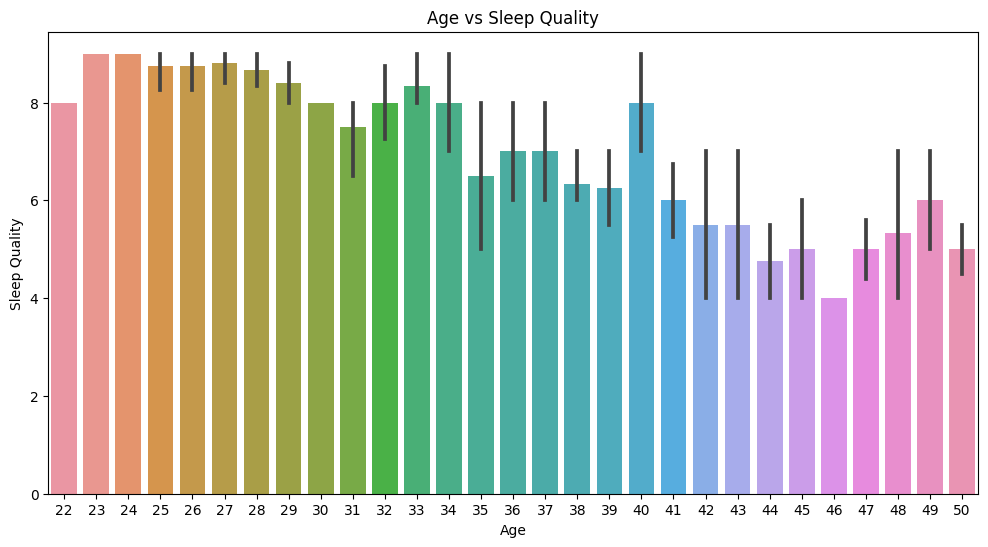

In [15]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Age", y = "Sleep Quality" , data = df)
plt.title("Age vs Sleep Quality")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()

# Creating linear relationship




In [16]:
X = df[['Age']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

In [17]:
model.intercept_

13.268812023190648

# Now check the slope


In [18]:
model.coef_

array([-0.17408531])

# Visualising Predicted values for X using Linear Regression

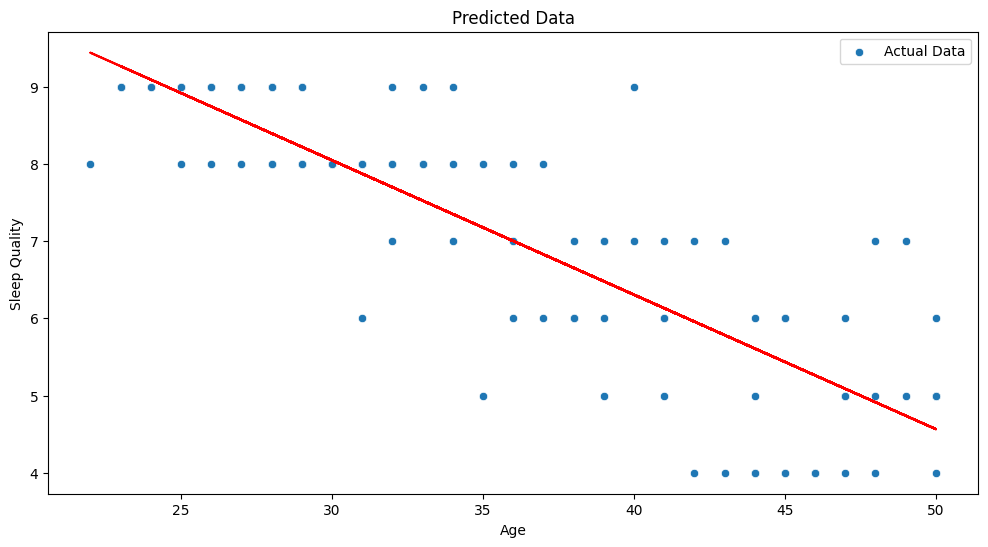

In [19]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Age", y = "Sleep Quality" , data = df , label = "Actual Data")

plt.plot(X, model.predict(X) ,color = "Red", label = "Predicted Data")
plt.title("Predicted Data")
plt.xlabel("Age")
plt.ylabel("Sleep Quality")
plt.show()


# Physical activity vs Sleep quality

In [20]:
df["Physical Activity Level"].head()

0    medium
1       low
2      high
3       low
4      high
Name: Physical Activity Level, dtype: object

In [21]:
custom_codes = {"high":1, "medium":2, "low":3}
df["Physical Activity Level"] = df["Physical Activity Level"].map(custom_codes)


In [22]:
df["Physical Activity Level"].head()

0    2
1    3
2    1
3    3
4    1
Name: Physical Activity Level, dtype: int64

<Axes: xlabel='Gender', ylabel='Physical Activity Level'>

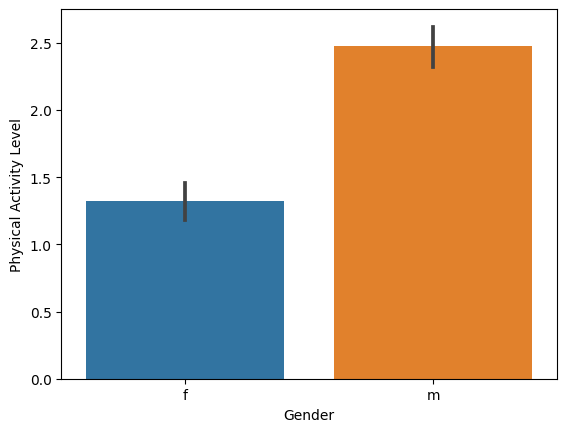

In [23]:
sns.barplot(x = "Gender", y = "Physical Activity Level", data = df)

# Time of sleep & Waking up vs Sleep quality

In [24]:
df["Bedtime"].head()

0    23:00
1    00:30
2    22:45
3    01:00
4    23:30
Name: Bedtime, dtype: object

In [25]:
df["Wake-up Time"].head()

0    06:30
1    07:00
2    06:45
3    06:30
4    07:00
Name: Wake-up Time, dtype: object

In [26]:
def sleep_time_helper_function(str_time):
    h = str_time.split(":")[0]
    m = str_time.split(":")[1]

    return int(h) + int(m)/60

df["Bedtime"] = df["Bedtime"].apply(sleep_time_helper_function)
df["Wake-up Time"] = df["Wake-up Time"].apply(sleep_time_helper_function)

In [27]:
df["Bedtime"].head()

0    23.00
1     0.50
2    22.75
3     1.00
4    23.50
Name: Bedtime, dtype: float64

In [28]:
df["Sleep Duration Hours"] = (df["Wake-up Time"] - df["Bedtime"])%24
df["Sleep Duration Hours"].head()

0    7.5
1    6.5
2    8.0
3    5.5
4    7.5
Name: Sleep Duration Hours, dtype: float64

In [29]:
df.head()

,Age,Gender,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Dietary Habits,Sleep Disorders,Medication Usage,Sleep Duration Hours
0,25,f,8,23.00,6.50,8000,2500,2,healthy,no,no,7.5
1,34,m,7,0.50,7.00,5000,2200,3,unhealthy,yes,yes,6.5
2,29,f,9,22.75,6.75,9000,2700,1,healthy,no,no,8.0
3,41,m,5,1.00,6.50,4000,2100,3,unhealthy,yes,no,5.5
4,22,f,8,23.50,7.00,10000,2800,1,medium,no,no,7.5


<Axes: xlabel='Bedtime', ylabel='Sleep Quality'>

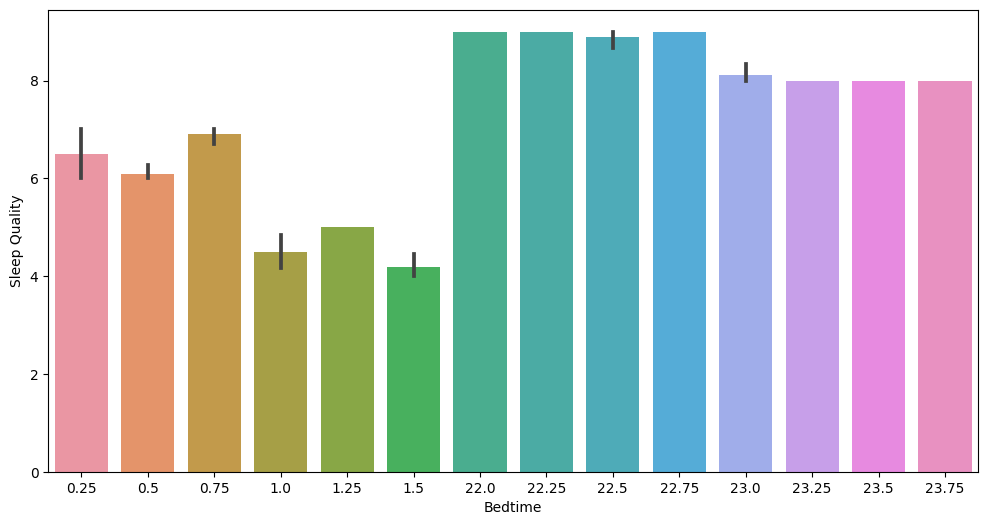

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Bedtime", y = "Sleep Quality", data = df)

<Axes: xlabel='Sleep Duration Hours', ylabel='Sleep Quality'>

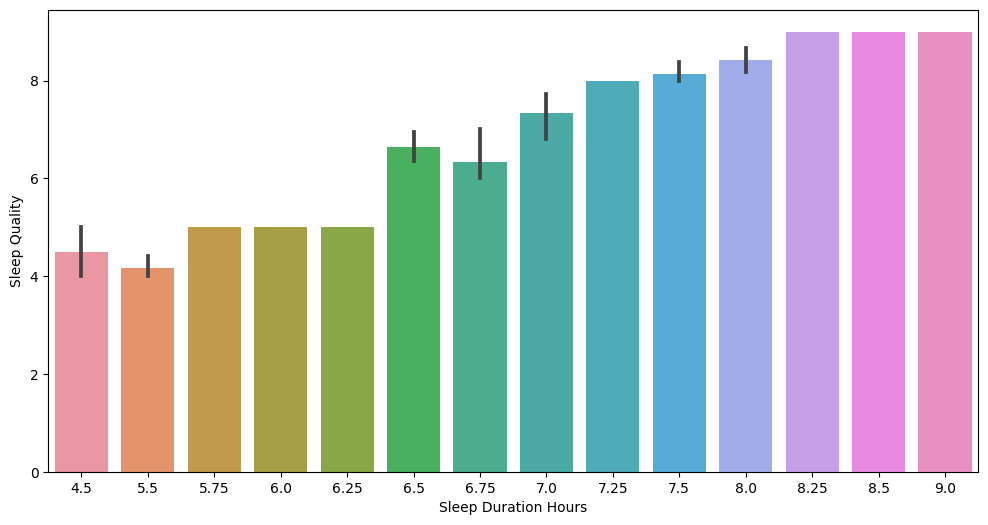

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Sleep Duration Hours", y = "Sleep Quality", data = df)

In [32]:
sleep_duration_quality_model = LinearRegression()

x = df[["Sleep Duration Hours"]]
y = df[["Sleep Quality"]]

sleep_duration_quality_model.fit(x,y)

LinearRegression()

In [33]:
sleep_duration_quality_model.coef_

array([[1.36940999]])

In [34]:
prediction = sleep_duration_quality_model.predict(x)

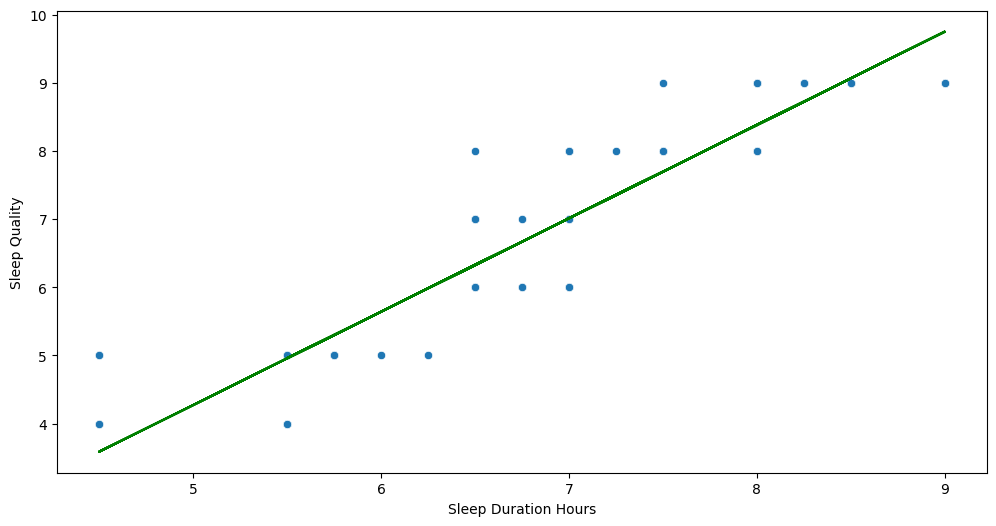

In [35]:
plt.figure(figsize = (12,6))
sns.scatterplot(x= "Sleep Duration Hours", y = "Sleep Quality", data = df)
plt.plot(x, prediction, color="green" , label = "Predicted values")
plt.show()

# Sleep Disorders vs Sleep Quality

In [36]:
df["Sleep Disorders"].head()

0     no
1    yes
2     no
3    yes
4     no
Name: Sleep Disorders, dtype: object

In [37]:
df["Sleep Quality"].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

<Axes: xlabel='Sleep Disorders', ylabel='Sleep Quality'>

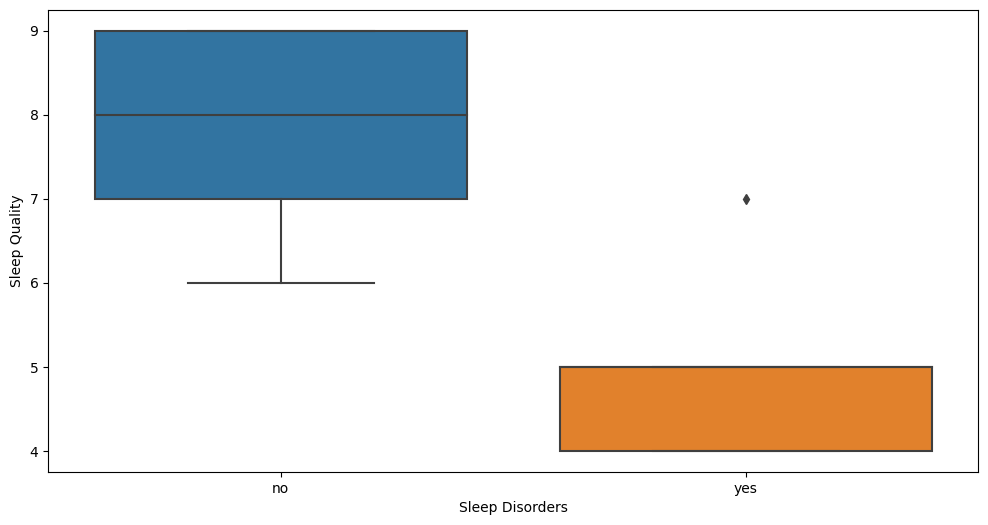

In [38]:
plt.figure(figsize = (12,6))
sns.boxplot(x = "Sleep Disorders", y = "Sleep Quality", data = df)

In [39]:
df_numeric_feature = df.select_dtypes(include = ["int64", "float64"])
df_numeric_feature.head()

,Age,Sleep Quality,Bedtime,Wake-up Time,Daily Steps,Calories Burned,Physical Activity Level,Sleep Duration Hours
0,25,8,23.00,6.50,8000,2500,2,7.5
1,34,7,0.50,7.00,5000,2200,3,6.5
2,29,9,22.75,6.75,9000,2700,1,8.0
3,41,5,1.00,6.50,4000,2100,3,5.5
4,22,8,23.50,7.00,10000,2800,1,7.5


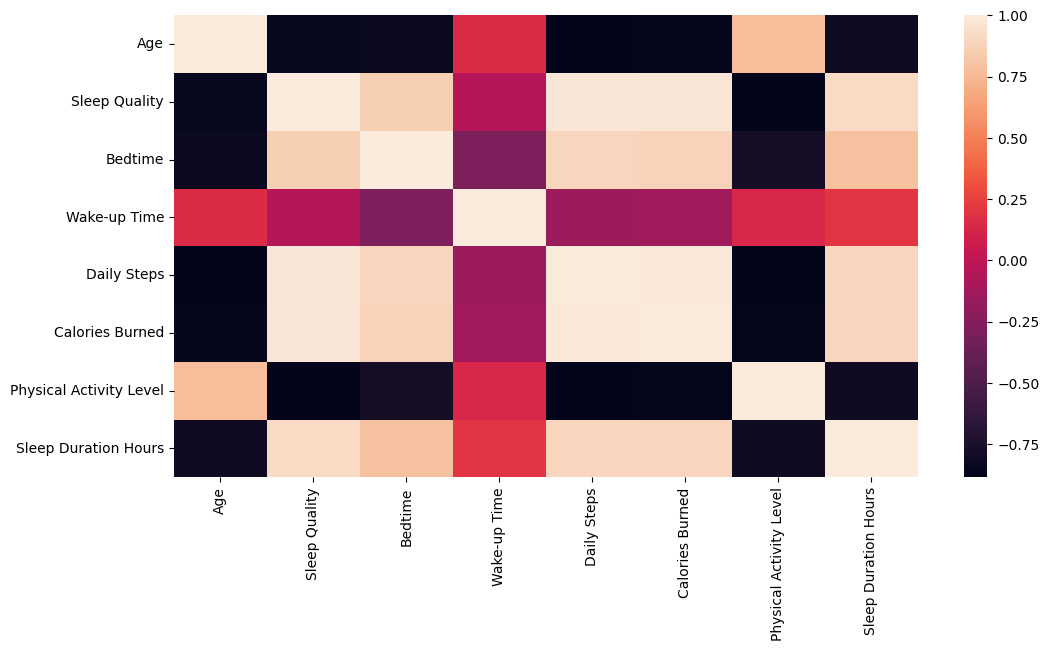

In [40]:
plt.figure(figsize = (12,6))
sns.heatmap(df_numeric_feature.corr())
plt.show()

# Calories Burned vs Sleep Quality

In [41]:
df["Calories Burned"].head()

0    2500
1    2200
2    2700
3    2100
4    2800
Name: Calories Burned, dtype: int64

In [42]:
df["Sleep Quality"].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

<Axes: xlabel='Calories Burned', ylabel='Sleep Quality'>

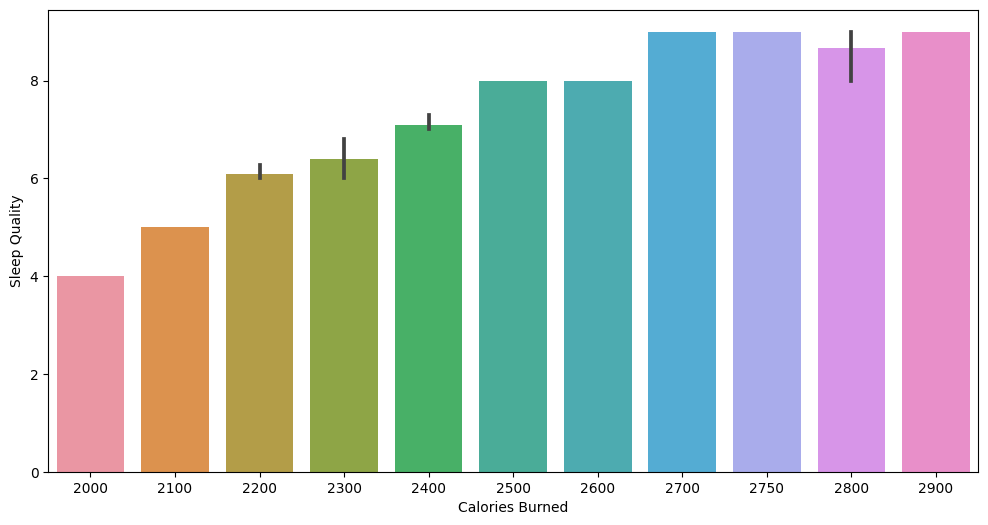

In [43]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Calories Burned" , y = "Sleep Quality" , data = df)

In [44]:
X = df[['Calories Burned']]
Y = df['Sleep Quality']

model = LinearRegression()

model.fit(X, Y)

LinearRegression()

In [45]:
model.intercept_

-7.5490928154048795

In [46]:
model.coef_

array([0.00600954])

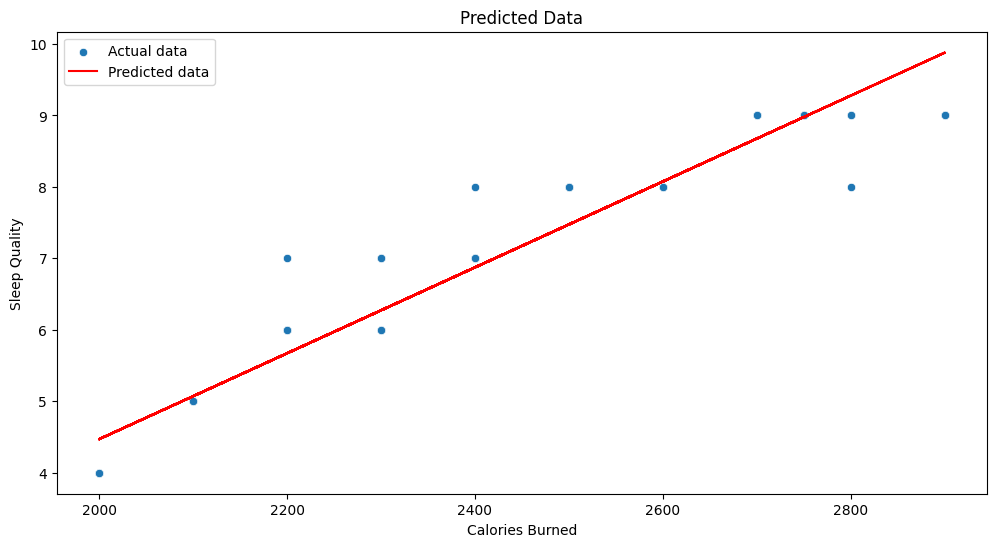

In [47]:
# Ensure proper alignment of data
X = df[['Calories Burned']].values  # 2D array
y = df['Sleep Quality']

# Fit the model
model.fit(X, y)

# Plot the scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(x="Calories Burned", y="Sleep Quality", data=df, label="Actual data")

# Plot the prediction line
plt.plot(df['Calories Burned'], model.predict(X), color="red", label="Predicted data")

# Add labels and legend
plt.title("Predicted Data")
plt.xlabel("Calories Burned")
plt.ylabel("Sleep Quality")
plt.legend()  # Add legend explicitly
plt.show()




# Daily Steps vs Sleep Quality

In [48]:
df["Daily Steps"].head()

0     8000
1     5000
2     9000
3     4000
4    10000
Name: Daily Steps, dtype: int64

In [49]:
df["Sleep Quality"].head()

0    8
1    7
2    9
3    5
4    8
Name: Sleep Quality, dtype: int64

<Axes: xlabel='Daily Steps', ylabel='Sleep Quality'>

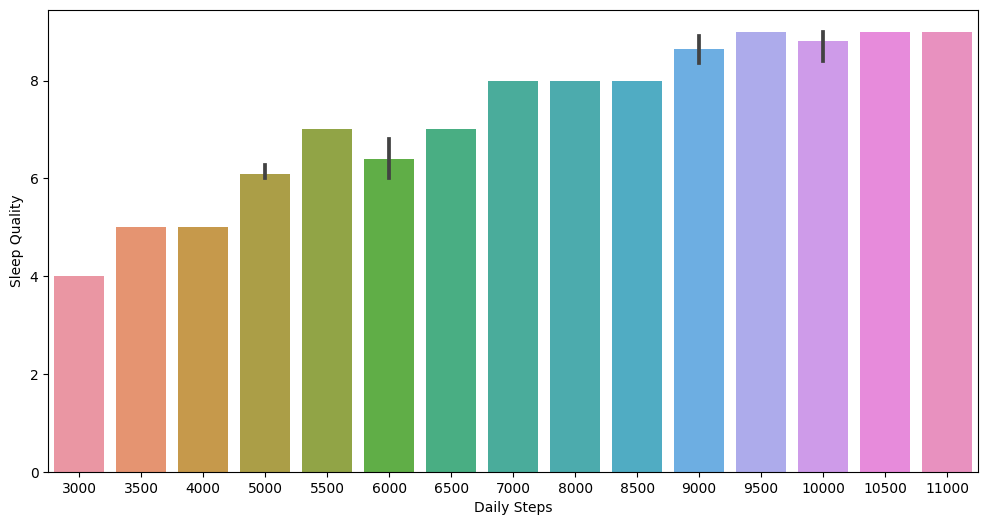

In [50]:
plt.figure(figsize = (12,6))
sns.barplot(x = "Daily Steps", y = "Sleep Quality", data = df)

In [51]:
X = df[["Daily Steps"]]
Y = df[["Sleep Quality"]]

model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [52]:
model.intercept_

array([2.37012829])

In [53]:
model.coef_

array([[0.00067787]])

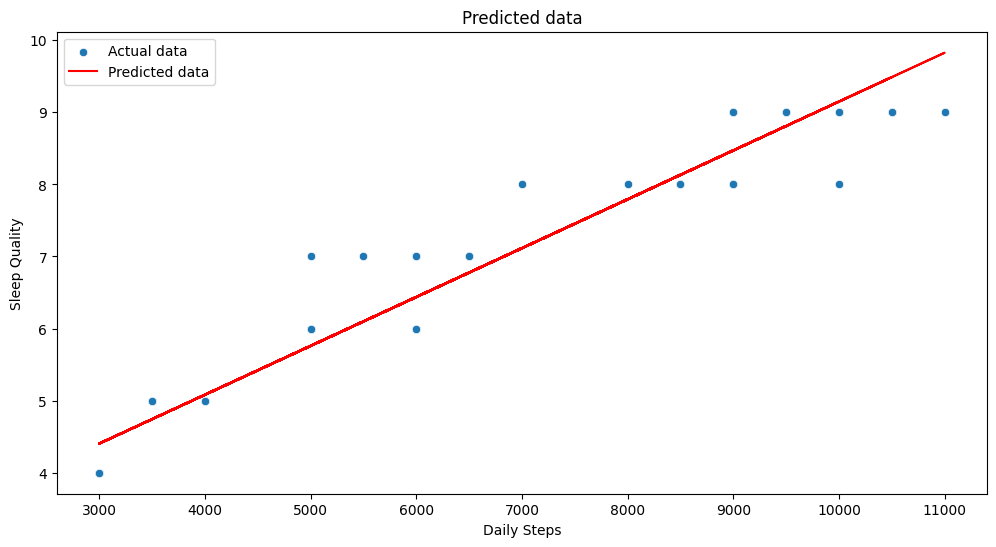

In [54]:
plt.figure(figsize = (12,6))
sns.scatterplot(x = "Daily Steps", y = "Sleep Quality", data = df, label = "Actual data")
plt.plot(df['Daily Steps'], model.predict(X), color="red", label="Predicted data")


plt.title("Predicted data")
plt.xlabel("Daily Steps")
plt.ylabel("Sleep Quality")
plt.legend()
plt.show()